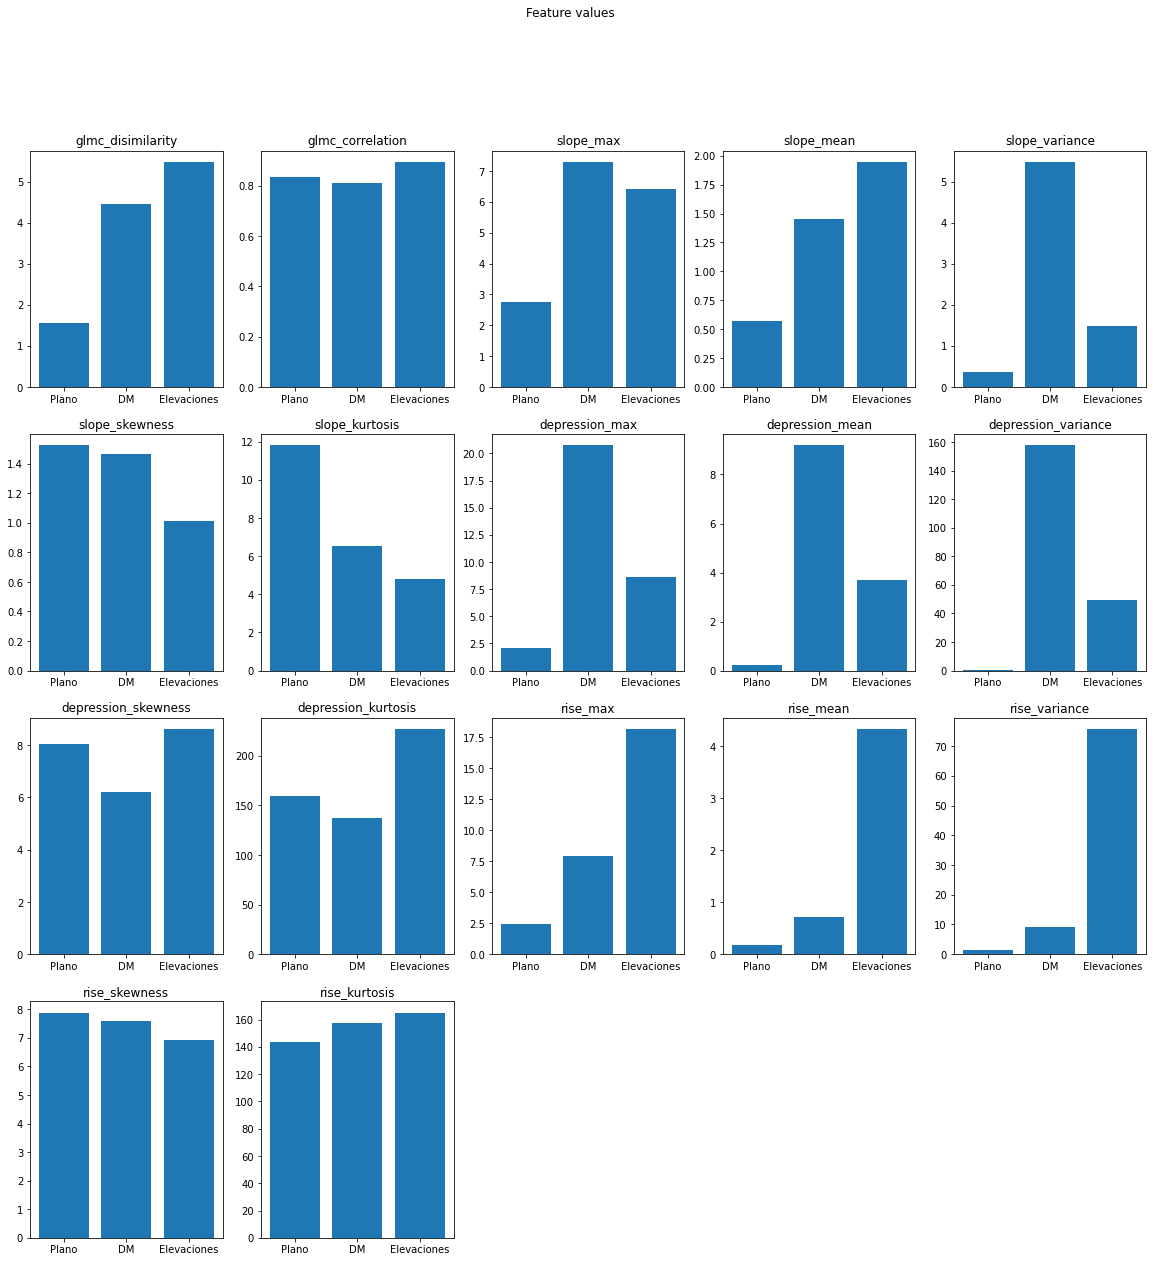

In [1]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = [
    'glmc_disimilarity',
    'glmc_correlation',
    'slope_max',
    'slope_mean',
    'slope_variance',
    'slope_skewness',
    'slope_kurtosis',
    'depression_max',
    'depression_mean',
    'depression_variance',
    'depression_skewness',
    'depression_kurtosis',
    'rise_max',
    'rise_mean',
    'rise_variance',
    'rise_skewness',
    'rise_kurtosis']
terrain_classes = ['Plano', 'DM', 'Elevaciones']
terrain_data = np.load('terrain_data.npy')
terrain_labels = np.load('terrain_data_labels.npy')
features_num = 17

labels = terrain_labels.copy()
classes_unique = np.unique(labels)
n_classes = len(terrain_classes)

terrain_means = np.zeros([n_classes, features_num])

for i in range(n_classes):
    for j in range(features_num):
        terrain_means[i, j] = terrain_data[labels == classes_unique[i], j].mean()

cols = 5
rows = int(features_num / cols) + (features_num % cols > 0)
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))

for i in range(features_num):
    r = int(i / cols)
    c = i - r * cols

    values = [row[i] for row in terrain_means]
    ax[r][c].bar(terrain_classes, values)
    ax[r][c].set_title(feature_names[i])

for i in range(features_num, rows * cols):
    r = int(i / cols)
    c = i - r * cols
    ax[r, c].axis('off')

fig.suptitle('Feature values')
plt.show()

In [2]:
to_delete = ['rise_skewness', 'rise_kurtosis', 'glmc_correlation', 'depression_skewness', 'slope_skewness']
deleted = []
for i in range(len(feature_names)):
    if feature_names[i] in to_delete:
        deleted.append(i)
# Delete the above features since they are making noise
new_features = np.delete(terrain_data, obj=deleted, axis=-1)
new_feature_names = np.delete(feature_names, obj=deleted, axis=-1)
print(new_features.shape)
print(new_feature_names)

(3223, 12)
['glmc_disimilarity' 'slope_max' 'slope_mean' 'slope_variance'
 'slope_kurtosis' 'depression_max' 'depression_mean' 'depression_variance'
 'depression_kurtosis' 'rise_max' 'rise_mean' 'rise_variance']


In [3]:
np.save('terrains_columns_metadata', new_feature_names)
np.save('processed_terrain_data', new_features)